In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'names')

In [3]:
def open_file(year):
    '''Функция считывает данные за указанный год из файла и формирует DataFrame'''
    file_name = 'yob' + str(year) + '.txt'
    names = pd.read_csv(os.path.join(DATA_DIR, file_name), 
                        names=['Name', 'Gender', 'Count'])
    return names

In [4]:
def sort_year(years_list):
    
    names_by_year = {}
    for year in years_list:
        names_by_year[year] = open_file(year)
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    return names_all

In [5]:
names_all = sort_year(range(1900, 2001))
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

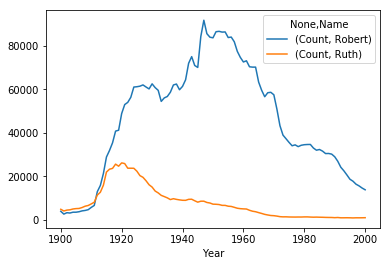

In [6]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

In [7]:
names_step = sort_year(range(1900, 2001, 5))
name_dynamics_step = names_step.groupby([names_step.index.get_level_values(0), 'Name']).sum()

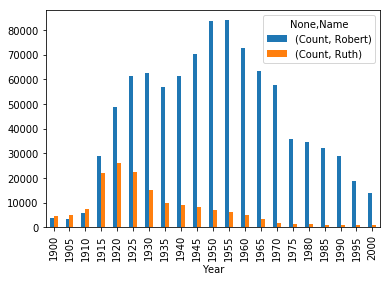

In [8]:
name_dynamics_step.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()